In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import copy
import math
import json
import re

In [2]:
# Enable inline plots
%matplotlib inline

In [3]:
pd.set_option("display.width", 70)

In [35]:
def calculateDistance(x1,y1,x2,y2):  
     dist = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)  
     return dist

In [99]:
def cleanhtml(raw_html):
    soup = BeautifulSoup(raw_html, "lxml")
    spans = soup.find_all('span')
    lowercase = ''.join([i.text.replace('Пользователь 2: ', '').replace('Пользователь 1: ', '') for i in spans]).lower()
    return re.sub('[^а-я]+', '', lowercase)

In [21]:
def shift_row(c, row_num, value):
    new_coords = copy.deepcopy(c)
    for idx, cell in enumerate(new_coords[row_num]):
        new_coords[row_num][idx][0] = new_coords[row_num][idx][0] + value
    return new_coords

In [20]:
def shift_col(c, col_num, value):
    new_coords = copy.deepcopy(c)
    for idx, row in enumerate(new_coords):
        new_coords[idx][col_num][1] = new_coords[idx][col_num][1] + value
    return new_coords

In [7]:
keyboard = [
    ['й','ц','у','к','е','н','г','ш','щ','з','х','ъ'],
    ['ф','ы','в','а','п','р','о','л','д','ж','э',''],
    ['я','ч','с','м','и','т','ь','б','ю','','',''],
]

In [62]:
thumbs = [
    ['ЛМ','ЛБ','ЛС','ЛУ','ЛУ','ПУ','ПУ','ПС','ПБ','ПМ','ПМ','ПМ'],
    ['ЛМ','ЛБ','ЛС','ЛУ','ЛУ','ПУ','ПУ','ПС','ПБ','ПМ','ПМ','ПМ'],
    ['ЛМ','ЛБ','ЛС','ЛУ','ЛУ','ПУ','ПУ','ПС','ПБ','ПМ','ПМ','ПМ'],
]

In [149]:
coords = [
    [[0,36],[18,36],[36,36],[54,36],[72,36],[90,36],[108,36],[126,36],[144,36],[162,36],[180,36],[198,36]],
    [[0,18],[18,18],[36,18],[54,18],[72,18],[90,18],[108,18],[126,18],[144,18],[162,18],[180,18],[198,18]],
    [[0,0],[18,0],[36,0],[54,0],[72,0],[90,0],[108,0],[126,0],[144,0],[162,0],[180,0],[198,0]],
]

In [76]:
def get_mapper(c, k):
    text_mapper = {
        item: {
            'x': c[idx][idy][0],
            'y': c[idx][idy][1],
            'thumb': thumbs[idx][idy]
        } for idx, sublist in enumerate(k) for idy, item in enumerate(sublist)
    }
    # print(json.dumps(text_mapper, indent=2, ensure_ascii=False))
    return text_mapper

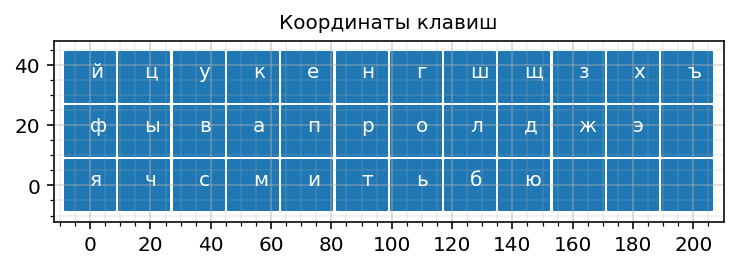

In [152]:
# new_coords = shift_row(coords, 1, 0)
# new_coords = shift_col(coords, 2, 0)

x = [i[0] for i in [item for sublist in new_coords for item in sublist]]
y = [i[1] for i in [item for sublist in new_coords for item in sublist]]
n = [item for sublist in keyboard for item in sublist]

fig, ax = plt.subplots()
ax.scatter(x, y, marker=",", s=620)
ax.set_title('Координаты клавиш', fontsize=10)
ax.set_aspect('equal', 'box')

# Or if you want different settings for the grids:
major_ticks = np.arange(-20, 210, 20)
minor_ticks = np.arange(-20, 210, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.axis([-12, 210, -12, 48])

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]), color='white')

In [39]:
x1, y1 = coords[0][0][0], coords[0][0][1]
x2, y2 = coords[2][11][0], coords[2][11][1]

print(calculateDistance(x1, y1, x2, y2))

201.24611797498108


In [24]:
# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [100]:
dialogues = pd.read_csv("datasets/dialogues.tsv", sep='\t')[['dialogue']]

In [101]:
dialogues['dialogue'] = dialogues['dialogue'].apply(cleanhtml)

In [102]:
dialogues.head()

,dialogue
0,приветрасскажиосебеприветподвкусныйкофеекнастр...
1,приветприветкакжизньотличносолнышкосветитптичк...
2,приветкакделадобрыйденьхорошочемувлекаетесьябе...
3,здравствуйтеялешаздравствуйтеяегоряучусьвкласс...
4,приветприветкактвоиделанормальноготовлюськосну...


In [109]:
sample = dialogues['dialogue'].iloc[0]


In [145]:
def count_distance(coords, text):
    mapper = get_mapper(coords, keyboard)
    distances = {
        'ЛМ': 0, 
        'ЛБ': 0,
        'ЛС': 0,
        'ЛУ': 0,
        'ПУ': 0,
        'ПС': 0,
        'ПБ': 0,
        'ПМ': 0,
    }
    default_position = {
        'ЛМ': coords[1][0], 
        'ЛБ': coords[1][1],
        'ЛС': coords[1][2],
        'ЛУ': coords[1][3],
        'ПУ': coords[1][6],
        'ПС': coords[1][7],
        'ПБ': coords[1][8],
        'ПМ': coords[1][9],
    }
    for idx, char in enumerate(text):
        x1 = default_position[mapper[char]['thumb']][0]
        y1 = default_position[mapper[char]['thumb']][1]

        x2 = mapper[char]['x']
        y2 = mapper[char]['y']

        distance = calculateDistance(x1, y1, x2, y2)

        if idx + 1 < len(text):
            next_char = text[idx + 1]
            if mapper[next_char]['thumb'] != mapper[char]['thumb']:
                distance += calculateDistance(x2, y2, x1, y1)
            if idx > 0:
                prev_char = text[idx - 1]
                if mapper[prev_char]['thumb'] == mapper[char]['thumb']:
                    x1 = mapper[prev_char]['x']
                    y1 = mapper[prev_char]['y']
                    distance = calculateDistance(x1, y1, x2, y2)

        distances[mapper[char]['thumb']] += distance
    return distances



In [154]:
count_distance(coords, sample)

{'ЛМ': 432.0,
 'ЛБ': 216.0,
 'ЛС': 900.0,
 'ЛУ': 2881.2278066509393,
 'ПУ': 2305.5998709579385,
 'ПС': 450.0,
 'ПБ': 468.0,
 'ПМ': 245.82337649086287}